In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('ex1data2.txt',header=None)

In [3]:
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
data.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


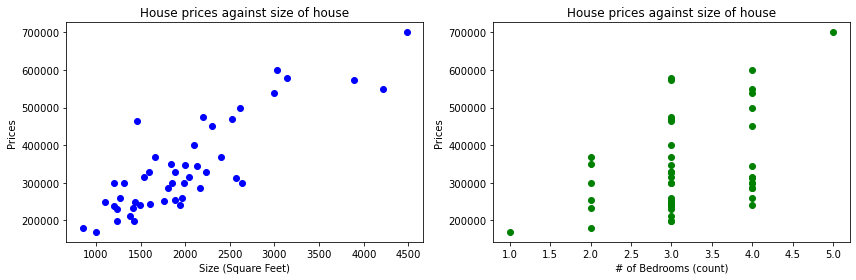

In [12]:
# Create 2 subplot, 1 for each variable
fig, axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)
axes[0].scatter(data[0],data[2],color='b')
axes[0].set_xlabel("Size (Square Feet)")
axes[0].set_ylabel("Prices")
axes[0].set_title("House prices against size of house")
axes[1].scatter(data[1],data[2],color='g')
axes[1].set_xlabel("# of Bedrooms (count)")
axes[1].set_ylabel("Prices")
axes[1].set_title("House prices against size of house")
# Enhance layout
plt.tight_layout()

In [14]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X_norm=(X-mean)/std
    
    return X_norm,mean,std

In [23]:
data_1=data.values
y=data_1[:,-1]
m=len(y)
y=data_1[:,-1].reshape(m,1)

In [24]:
Xnew=data_1[:,0:2].reshape(m,2)
Xnew,mean1,std1=featureNormalization(data_1[:,0:2])

In [25]:
m

47

In [26]:
Xnew=np.append(np.ones((m,1)),Xnew,axis=1)

In [67]:
theta=np.zeros((3,1))

In [68]:
def computeCost(x,y,theta):
    m=len(x)
    error_sq=(np.dot(theta.T,x)-y)**2
    Jtheta=(1/(2*m))*np.sum(error_sq)
    return theta,Jtheta

In [77]:
np.random.seed(100)
a=np.random.randn(6,2)
b=np.random.randn(6,1)
theta=np.random.randn(6,1)
a
t,cost=computeCost(a,b,theta)

In [97]:
def gradientDescent(x,y,theta,alpha,iters):
    m=len(x)
    J_history=[]
    for i in range(iters):
        error=(np.dot(theta.T,x)-y)
        delta=(1/m)*np.sum((np.dot(error.T,x)))
        #print("Delta Shape is: {}",delta.shape)
        theta=theta-(alpha*delta)
        #print(theta)
        #aa,J_history[i]=computeCost(x,y,theta)
        J_history.append(computeCost(x,y,theta))
    return theta, J_history

In [100]:
theta,J_history = gradientDescent(a,b,theta,0.01,1500)
J_history

[(array([[59.18574778],
         [58.50556516],
         [61.24286506],
         [61.16548858],
         [59.37200426],
         [58.78144766]]),
  73.49692387903215),
 (array([[59.19084906],
         [58.51066644],
         [61.24796635],
         [61.17058986],
         [59.37710555],
         [58.78654895]]),
  73.51092366774878),
 (array([[59.19595006],
         [58.51576744],
         [61.25306735],
         [61.17569086],
         [59.38220655],
         [58.79164995]]),
  73.5249240343071),
 (array([[59.20105078],
         [58.52086816],
         [61.25816806],
         [61.18079158],
         [59.38730726],
         [58.79675066]]),
  73.53892497852404),
 (array([[59.20615121],
         [58.52596859],
         [61.26326849],
         [61.18589201],
         [59.39240769],
         [58.80185109]]),
  73.55292650021596),
 (array([[59.21125136],
         [58.53106873],
         [61.26836864],
         [61.19099215],
         [59.39750784],
         [58.80695124]]),
  73.5669285991

ValueError: setting an array element with a sequence.

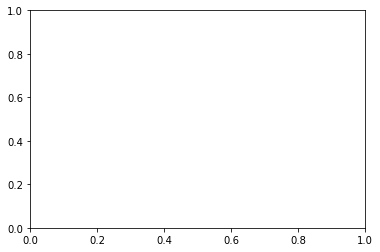

In [101]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")